In [130]:
from pylab import *

In [131]:
from pythtb import *

In [132]:
def ModeloHOTI(ɣ=0.5,λ=1.0):
    lat = [[1,0],[0,1]]
    orb = [[1/4,1/4],[3/4,1/4],[1/4,3/4],[3/4,3/4]]
    HOTI2D = tb_model(2,2,lat,orb)
    HOTI2D.set_hop( -ɣ,0,1,[0,0] )
    HOTI2D.set_hop(  ɣ,1,3,[0,0] )
    HOTI2D.set_hop(  ɣ,2,3,[0,0] )
    HOTI2D.set_hop(  ɣ,0,2,[0,0] )

    HOTI2D.set_hop(  -λ,0,1,[-1,0] )
    HOTI2D.set_hop(   λ,2,3,[-1,0] )
    HOTI2D.set_hop(   λ,0,2,[0,-1] )
    HOTI2D.set_hop(   λ,1,3,[0,-1] )
    return HOTI2D

In [176]:
HOTI2D_Topo = ModeloHOTI()
HOTI2D_Triv = ModeloHOTI(ɣ=1.5)

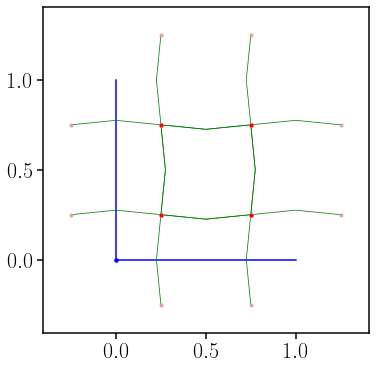

In [177]:
(fig,ax)=HOTI2D_Topo.visualize(0,1)

In [178]:
def GetEvals2Dmesh(modelo,Num=40):
    Num = 40
    KX,KY = meshgrid(linspace(0,1,Num),linspace(0,1,Num))
    KX = KX.flatten()
    KY = KY.flatten()
    kvec = column_stack((KX,KY))
    Evals = modelo.solve_all(kvec)
    Evals = Evals.reshape((4,Num,Num))
    KX = KX.reshape((Num,Num))
    KY = KY.reshape((Num,Num))
    return KX,KY,Evals

In [179]:
KXTopo,KYTopo,EvalsTopo = GetEvals2Dmesh(HOTI2D_Topo)
KXTriv,KYTriv,EvalsTriv = GetEvals2Dmesh(HOTI2D_Triv)

In [180]:
def GetDataFig3D(KX,KY,Evals):
    DATA = []
    for Eband in Evals:
        DATA.append(go.Surface(\
            z=Eband.reshape(Num,Num), 
            x=KX.reshape(Num,Num), 
            y=KY.reshape(Num,Num), 
            showscale=False,
            colorscale=[[0., 'rgb(66, 53, 123)'],[1., 'rgb(66, 53, 123)']], 
            cmin=-6, cmax=6))
    return DATA

In [181]:
import plotly.graph_objects as go

In [182]:
DATA = GetDataFig3D(KXTopo,KYTopo,EvalsTopo)
fig  = go.Figure( data=DATA)
fig.show()

# Infinite cell

In [219]:
mpl.rcParams.update({'font.size': 18, 'text.usetex': True})
mpl.rcParams.update({'axes.linewidth':1.5})
mpl.rcParams.update({'axes.labelsize':'large'})
mpl.rcParams.update({'xtick.major.size':6})
mpl.rcParams.update({'xtick.minor.size':4}) 
mpl.rcParams.update({'ytick.major.size':6})
mpl.rcParams.update({'ytick.minor.size':4})
mpl.rcParams.update({'xtick.major.width':1.5})
mpl.rcParams.update({'xtick.minor.width':1.0})
mpl.rcParams.update({'ytick.major.width':1.5})
mpl.rcParams.update({'ytick.minor.width':1.0})
mpl.rcParams.update({'legend.frameon':False,'legend.framealpha':0.0})

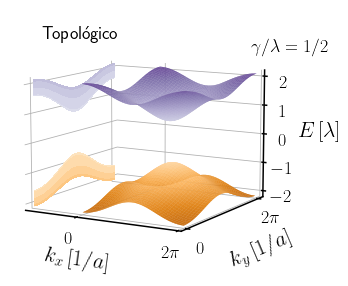

In [271]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5),
                      subplot_kw={"projection": "3d"})
for Eband in EvalsTopo:
    ax.plot_surface(KXTopo,KYTopo,Eband,cmap='PuOr',vmax=3,vmin=-3,alpha=0.8)
ax.contourf(KXTopo, KYTopo, EvalsTopo[3], zdir='x', offset=-0.5, cmap='PuOr',vmax=3,vmin=-3)
ax.contourf(KXTopo, KYTopo, EvalsTopo[0], zdir='x', offset=-0.5, cmap='PuOr_r',vmax=3,vmin=-3)
ax.view_init(10, 300)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$E\,[\lambda]$',rotation=0,labelpad=14.0);
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlim(-0.5,1)
ax.set_xticks([0,1])
ax.set_xticklabels([r'$0$',r'$2\pi$'])
ax.set_yticks([0,1])
ax.set_yticklabels([r'$0$',r'$2\pi$'])
ax.set_ylabel(r'$k_y\,[1/a]$',labelpad=12.0)
ax.set_xlabel(r'$k_x\,[1/a]$',labelpad=12.0)
ax.text(1.6,0,3.5,r'$\gamma/\lambda =1/2$');
ax.text(-0.4,0,3.5,r'Topológico');

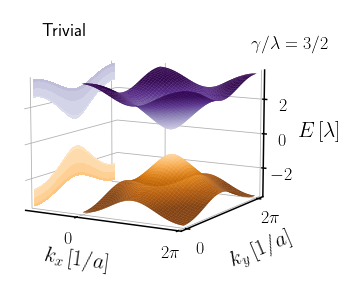

In [272]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5),
                      subplot_kw={"projection": "3d"})
for Eband in EvalsTriv:
    ax.plot_surface(KXTriv,KYTriv,Eband,cmap='PuOr',vmax=3,vmin=-3,alpha=0.8)
ax.contourf(KXTriv, KYTriv, EvalsTriv[3], zdir='x', offset=-0.5, cmap='PuOr',vmax=3,vmin=-3)
ax.contourf(KXTriv, KYTriv, EvalsTriv[0], zdir='x', offset=-0.5, cmap='PuOr_r',vmax=3,vmin=-3)
ax.view_init(10, 300)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$E\,[\lambda]$',rotation=0,labelpad=14.0);
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlim(-0.5,1)
ax.set_xticks([0,1])
ax.set_xticklabels([r'$0$',r'$2\pi$'])
ax.set_yticks([0,1])
ax.set_yticklabels([r'$0$',r'$2\pi$'])
ax.set_ylabel(r'$k_y\,[1/a]$',labelpad=12.0)
ax.set_xlabel(r'$k_x\,[1/a]$',labelpad=12.0)
ax.text(1.6,0,6.0,r'$\gamma/\lambda = 3/2$');
ax.text(-0.4,0,6.0,r'Trivial');

# Finite cell

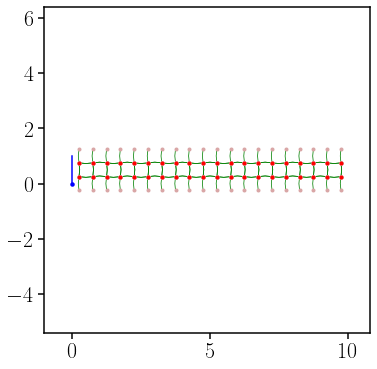

In [124]:
scX = HOTI2D.cut_piece(10,0)
(fig,ax) = scX.visualize(0,1)

In [273]:
def GetEvalsFinite(modelo,direc=0,nrep=60):
    scX = modelo.cut_piece(60,direc)
    k = [[0],[1]]
    kvec, kdist, knode = modelo.k_path(k,100)
    Evals = modelo.solve_all(kvec)
    return kdist,Evals

In [ ]:
scXTopo = GetEvalsFinite(HOTI2D_Topo,direc=0)
scYTopo = GetEvalsFinite(HOTI2D_Topo,direc=1)

scXTriv = GetEvalsFinite(HOTI2D_Topo,direc=0)
scYTriv = GetEvalsFinite(HOTI2D_Topo,direc=1)


In [125]:
scX = HOTI2D.cut_piece(60,0)
k = [[0],[1]]
kvec, kdist, knode = scX.k_path(k,100)
EvalsX = scX.solve_all(kvec)

scY = HOTI2D.cut_piece(60,1)
k = [[0],[1]]
kvec, kdist, knode = scY.k_path(k,100)
EvalsY = scY.solve_all(kvec)

 Path in 1D BZ defined by nodes at [0 1]

 Path in 1D BZ defined by nodes at [0 1]



/home/jebarrios/anaconda3/envs/kwant/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



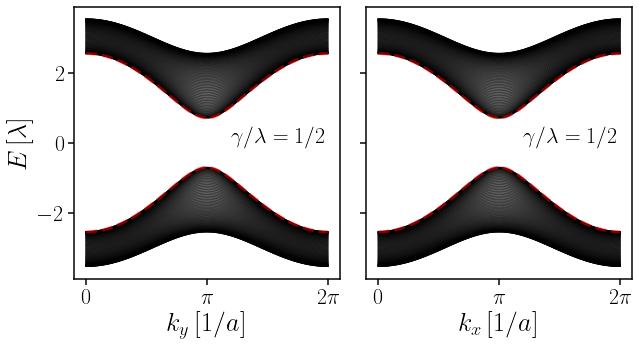

In [126]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5),   
         gridspec_kw={'wspace': 0.1},sharey=True)



for Eband in EvalsX:
    ax[0].plot(kdist,Eband,c='k',alpha=0.5)
ax[0].plot(kdist,EvalsX[len(EvalsX)//2  ],lw=3,c='r',ls='--',alpha=0.3 )
ax[0].plot(kdist,EvalsX[len(EvalsX)//2+1],lw=3,c='r',ls='--',alpha=0.3 )
ax[0].plot(kdist,EvalsX[len(EvalsX)//2-1],lw=3,c='r',ls='--',alpha=0.3 )
ax[0].plot(kdist,EvalsX[len(EvalsX)//2-2],lw=3,c='r',ls='--',alpha=0.3 )
ax[0].set_ylabel(r'$E\,[{\rm \lambda}]$')
ax[0].text(0.6,0.0,r'$\gamma/\lambda=1/2$')
ax[0].set_xticks([0,0.5,1.0])
ax[0].set_xticklabels([r'$0$',r'$\pi$',r'$2\pi$'])
ax[0].set_xlabel(r'$k_y\,[1/a]$')

for Eband in EvalsY:
    ax[1].plot(kdist,Eband,c='k',alpha=0.5)
ax[1].plot(kdist,EvalsY[len(EvalsY)//2  ],lw=3,c='r',ls='--',alpha=0.3 )
ax[1].plot(kdist,EvalsY[len(EvalsY)//2+1],lw=3,c='r',ls='--',alpha=0.3 )
ax[1].plot(kdist,EvalsY[len(EvalsY)//2-1],lw=3,c='r',ls='--',alpha=0.3 )
ax[1].plot(kdist,EvalsY[len(EvalsY)//2-2],lw=3,c='r',ls='--',alpha=0.3 )
ax[1].text(0.6,0.0,r'$\gamma/\lambda=1/2$')
ax[1].set_xticks([0,0.5,1.0])
ax[1].set_xticklabels([r'$0$',r'$\pi$',r'$2\pi$'])
ax[1].set_xlabel(r'$k_x\,[1/a]$')


fig.tight_layout()

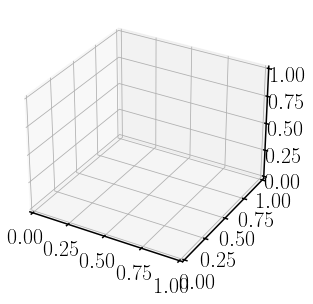

In [116]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5),
                      subplot_kw={"projection": "3d"})
